In [125]:
#Libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## Data Loading

In [126]:
df1 = pd.read_csv('C:\\Durham College AI Algo\\AI Algo\\Final Project\\test.csv')
df2 = pd.read_csv('C:\\Durham College AI Algo\\AI Algo\\Final Project\\train.csv')
frames = [df1, df2]
df = pd.concat(frames)

In [127]:
# Raw Data
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [128]:
# Raw Data
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,19556,90035,12360,77959,36875
Gender,Female,Female,Male,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182
Inflight wifi service,5,1,2,0,2
Departure/Arrival time convenient,4,1,0,0,3


## Data Cleaning

In [129]:
# drop Unnamed and id columns as it is of no use
df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
df.drop(labels=["id"],axis=1,inplace=True)

In [130]:
df.head().transpose()

,0,1,2,3,4
Gender,Female,Female,Male,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182
Inflight wifi service,5,1,2,0,2
Departure/Arrival time convenient,4,1,0,0,3
Ease of Online booking,3,3,2,0,4
Gate location,4,1,4,2,3


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [132]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [133]:
df.skew()

Age                                 -0.003606
Flight Distance                      1.108142
Inflight wifi service                0.040465
Departure/Arrival time convenient   -0.332469
Ease of Online booking              -0.018779
Gate location                       -0.058265
Food and drink                      -0.155063
Online boarding                     -0.456911
Seat comfort                        -0.485818
Inflight entertainment              -0.366385
On-board service                    -0.421320
Leg room service                    -0.348414
Baggage handling                    -0.677400
Checkin service                     -0.366569
Inflight service                    -0.691580
Cleanliness                         -0.300926
Departure Delay in Minutes           6.821980
Arrival Delay in Minutes             6.670125
dtype: float64

In [134]:
df.kurtosis()

Age                                   -0.719140
Flight Distance                        0.265503
Inflight wifi service                 -0.848598
Departure/Arrival time convenient     -1.040896
Ease of Online booking                -0.913523
Gate location                         -1.031553
Food and drink                        -1.145381
Online boarding                       -0.698655
Seat comfort                          -0.922839
Inflight entertainment                -1.061113
On-board service                      -0.888842
Leg room service                      -0.983014
Baggage handling                      -0.383775
Checkin service                       -0.829904
Inflight service                      -0.358253
Cleanliness                           -1.014801
Departure Delay in Minutes           100.644546
Arrival Delay in Minutes              95.117114
dtype: float64

<a id = "2"></a><br>
# Variable Description
1. id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. Check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

* int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
* object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
* float64(1): Arrival Delay in Minutes.

# Exploratory Data Analysis

<a id = "3"></a><br>
# Univariate Variable Analysis

* Categorical Variables: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.
* Numerical Variables: id,Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

<a id = "4"></a><br>
## Categorical Variables

In [136]:
def bar_plot(variable):
    
    var=df[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_Value))

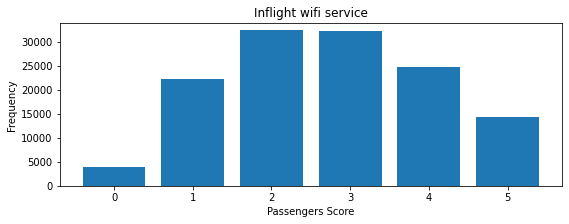

Inflight wifi service:
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64


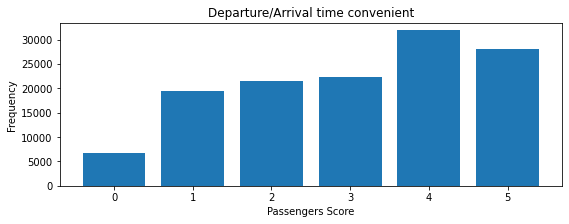

Departure/Arrival time convenient:
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64


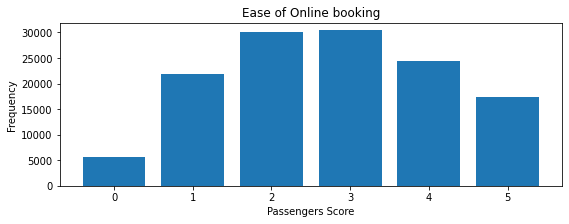

Ease of Online booking:
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64


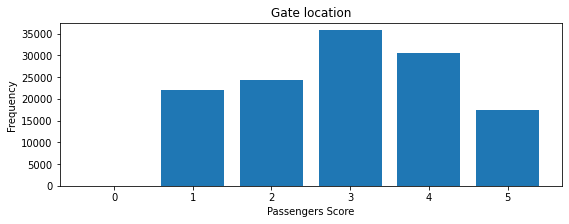

Gate location:
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64


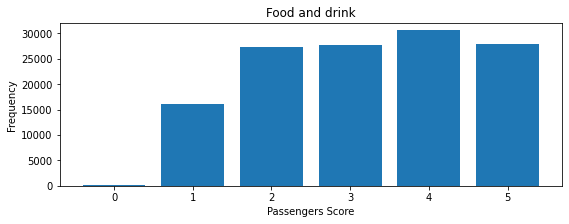

Food and drink:
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64


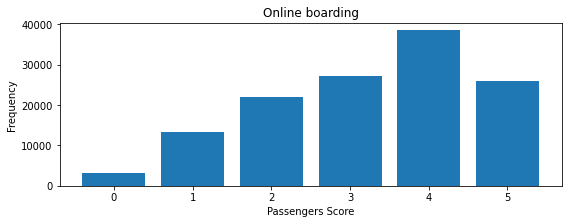

Online boarding:
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dtype: int64


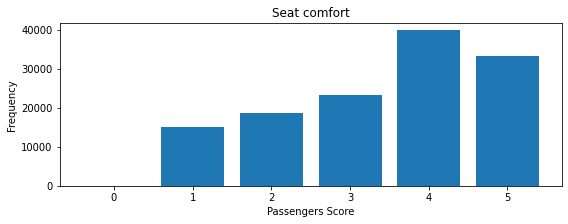

Seat comfort:
4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat comfort, dtype: int64


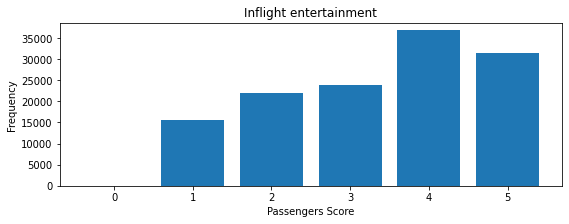

Inflight entertainment:
4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: Inflight entertainment, dtype: int64


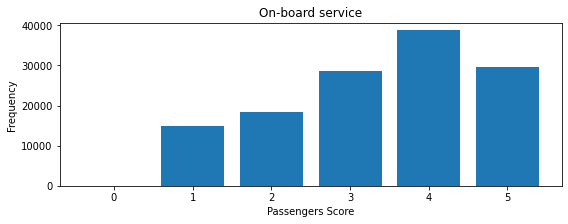

On-board service:
4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board service, dtype: int64


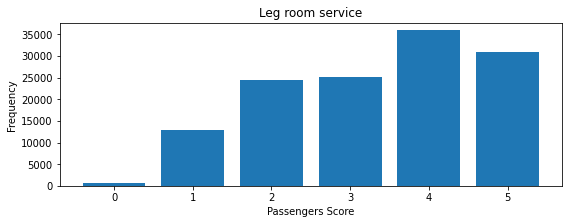

Leg room service:
4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: Leg room service, dtype: int64


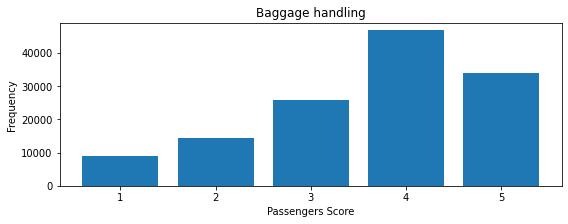

Baggage handling:
4    46761
5    33878
3    25851
2    14362
1     9028
Name: Baggage handling, dtype: int64


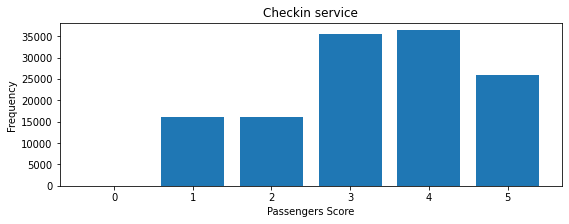

Checkin service:
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Checkin service, dtype: int64


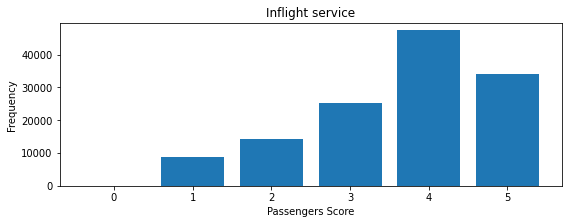

Inflight service:
4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: Inflight service, dtype: int64


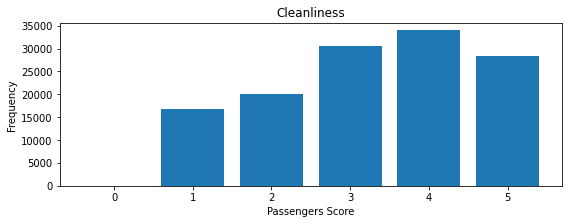

Cleanliness:
4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64


In [137]:
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

The visualizations above are showing us the frequency distribution between different categorical features and also giving us the count or frequency of the features in written after every individual visualization.

In [138]:
category2=["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for c in category2:
    print("{} \n".format(df[c].value_counts()))

Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64 

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64 



The above print statements giving us the information about the number of passengers in different categorical features.

<a id = "5"></a><br>
## Numerical Variable

In [139]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

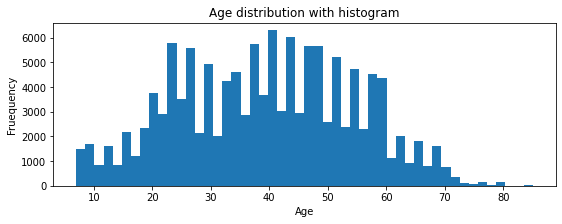

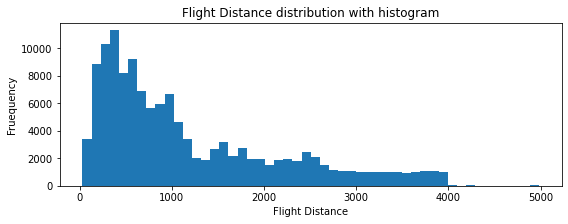

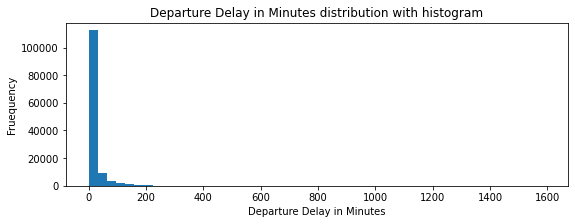

C:\Users\sonal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sonal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


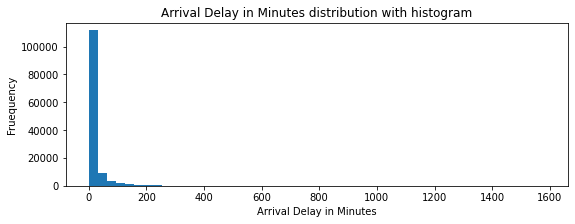

In [140]:
numericVar=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numericVar:
    plot_hist(n)

The above visualizations showing us the distribution in different numerical columns.

## Data Cleaning 

<a id = "6"></a><br>
* First of all, I will turn it into numerical to use some object properties in the data. 
* The feature we will classify will be "satisfaction". We make it numeric too. satisfaction (0:neutral or dissatisfied, 1: satisfied)

In [141]:
df.columns=[each.replace(" ","_") for each in df.columns]

In [142]:
df.head().transpose()

,0,1,2,3,4
Gender,Female,Female,Male,Male,Female
Customer_Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type_of_Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight_Distance,160,2863,192,3377,1182
Inflight_wifi_service,5,1,2,0,2
Departure/Arrival_time_convenient,4,1,0,0,3
Ease_of_Online_booking,3,3,2,0,4
Gate_location,4,1,4,2,3


In [143]:
df["satisfaction"]=[1 if each=="satisfied" else 0 for each in df.satisfaction]

In [144]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Gender,Female,Female,Male,Male,Female,Male,Female,Female,Male,Female
Customer_Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49,16,77,43,47,46
Type_of_Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco,Eco,Business,Business,Eco,Business
Flight_Distance,160,2863,192,3377,1182,311,3987,2556,556,1744
Inflight_wifi_service,5,1,2,0,2,3,5,2,5,2
Departure/Arrival_time_convenient,4,1,0,0,3,3,5,2,2,2
Ease_of_Online_booking,3,3,2,0,4,3,5,2,2,2
Gate_location,4,1,4,2,3,3,5,2,2,2


* Now let's look at the effect of some features on satisfaction

* Gender --> satisfaction
* Age --> satisfaction
* Type_of_Travel --> satisfaction
* Class --> satisfaction
* Customer_Type --> satisfaction
* Cleanliness --> satisfaction
* Inflight_wifi_service --> satisfaction
* Inflight_entertainment --> satisfaction
* Food_and_drink --> satisfaction
* Seat_comfort --> satisfaction

In [145]:
# Gender vs satisfaction
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.440115
0,Female,0.428975


* Satisfaction rate of male passengers 44%, satification rate of female passenger 43%

In [146]:
# Age vs satisfaction
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
34,41,0.609259
44,51,0.603600
39,46,0.602671
46,53,0.588978
45,52,0.587149
...,...,...
62,69,0.140175
3,10,0.135036
63,70,0.127937
1,8,0.101631


* The most satisfied age group 46-56.

In [147]:
# Type_of_Travel vs satisfaction
df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type_of_Travel,satisfaction
0,Business travel,0.583724
1,Personal Travel,0.101326


* 58% of passengers traveling on business are satisfied, 10% of passengers traveling on personal are satisfied. It's interesting statistic.

In [148]:
# Class vs satisfaction
df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.694434
2,Eco Plus,0.246414
1,Eco,0.187673


* %69 of passenger class on business are satisfied, %25 of passenger class on eco plus are satisfied, %19 of passenger class on eco are satisfied. It is interesting that there is such a difference in satisfaction between eco and business.

In [149]:
# Customer_Type vs satisfaction
df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer_Type,satisfaction
0,Loyal Customer,0.478115
1,disloyal Customer,0.239697


* As it is obvious that Loyal Customer most satisfied than disloyal customer.

In [150]:
# Cleanliness vs satisfaction
df[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Cleanliness,satisfaction
5,5,0.612472
4,4,0.535282
3,3,0.433075
2,2,0.212649
1,1,0.196963
0,0,0.000000


* Most of those who give 5 points to cleanliness are satisfied with the flight.

In [151]:
# Inflight_wifi_service vs satisfaction
df[["Inflight_wifi_service","satisfaction"]].groupby(["Inflight_wifi_service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_wifi_service,satisfaction
0,0,0.997446
5,5,0.990178
4,4,0.600767
1,1,0.328198
3,3,0.251825
2,2,0.247215


* Most of those who give 0 to wifi service on the plane are satisfied with the flight. It seems that wifi service is not that important.

In [152]:
# Inflight_entertainment vs satisfaction
df[["Inflight_entertainment","satisfaction"]].groupby(["Inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_entertainment,satisfaction
5,5,0.650615
4,4,0.611128
3,3,0.273154
2,2,0.212673
1,1,0.141946
0,0,0.000000


* There is a standard distribution in flight entertainment.

In [153]:
# Food_and_drink vs satisfaction
df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
5,5,0.550882
4,4,0.525832
0,0,0.416667
3,3,0.397424
2,2,0.389000
1,1,0.199551


* 20% of the passengers who do not like the food are satisfied with the flight.Interesting statistic.

In [154]:
# Seat_comfort vs satisfaction
df[["Seat_comfort","satisfaction"]].groupby(["Seat_comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Seat_comfort,satisfaction
5,5,0.651336
4,4,0.560293
2,2,0.226024
1,1,0.223325
3,3,0.214078
0,0,0.000000


* There is no one that gives the seat comfort 0 points.

<a id = "7"></a><br>
# Outlier Detection
* Outlier detection is very important for the correct operation of the model when installing the model.

In [155]:
numerical_features = df.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

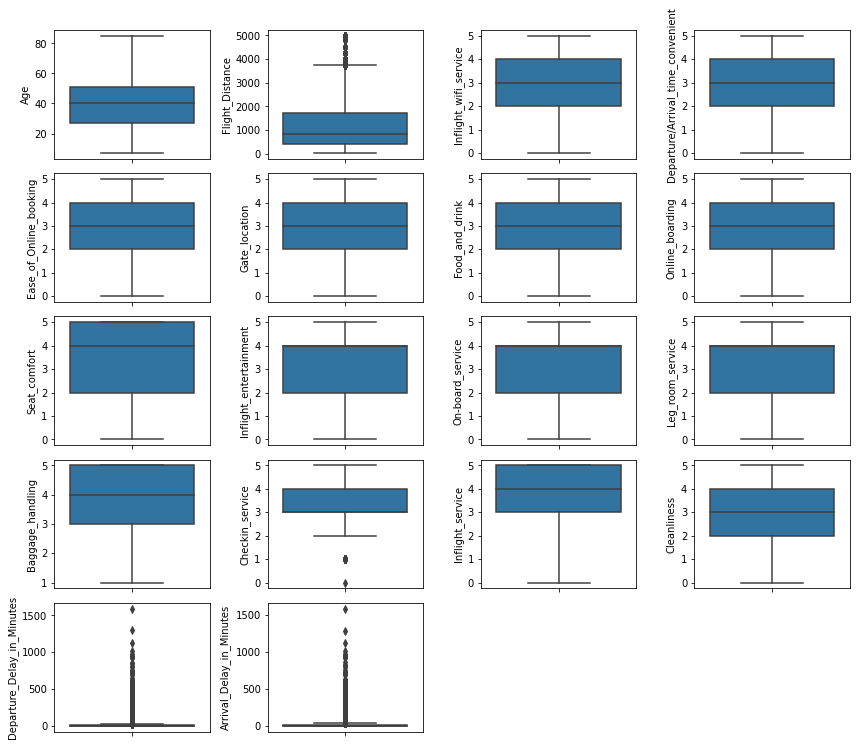

In [156]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [157]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [158]:
df.loc[detect_outliers(df,[ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'])]

C:\Users\sonal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
145,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,1,...,2,4,3,4,1,2,1,180,178.0,0
145,Male,Loyal Customer,68,Personal Travel,Eco,480,3,4,3,3,...,5,2,4,3,4,4,5,7,6.0,0
305,Male,Loyal Customer,56,Business travel,Business,3927,4,4,4,4,...,4,4,4,4,4,4,4,0,1.0,1
305,Female,disloyal Customer,62,Business travel,Eco,255,3,3,2,2,...,2,1,5,3,1,3,2,113,107.0,0
753,Male,Loyal Customer,54,Business travel,Business,3995,3,1,1,1,...,3,3,3,3,1,3,4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,Male,Loyal Customer,31,Business travel,Eco Plus,374,1,5,2,2,...,1,4,3,4,1,4,1,109,109.0,0
25670,Male,Loyal Customer,34,Business travel,Business,2844,2,2,3,2,...,4,4,4,4,3,4,3,120,128.0,1
25670,Male,Loyal Customer,68,Personal Travel,Business,589,3,3,3,5,...,3,3,3,3,1,3,4,37,62.0,0
25681,Female,Loyal Customer,55,Personal Travel,Eco,683,2,4,2,3,...,3,3,2,3,5,3,4,31,34.0,0


In [159]:
# drop outliers
df = df.drop(detect_outliers(df,[ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes']),axis = 0).reset_index(drop = True)

C:\Users\sonal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [160]:
df.head().transpose()

,0,1,2,3,4
Gender,Female,Female,Male,Male,Female
Customer_Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type_of_Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight_Distance,160,2863,192,3377,1182
Inflight_wifi_service,5,1,2,0,2
Departure/Arrival_time_convenient,4,1,0,0,3
Ease_of_Online_booking,3,3,2,0,4
Gate_location,4,1,4,2,3


<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [161]:
df.shape

(129245, 23)

In [162]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


<a id = "9"></a><br>
## Find Missing Value

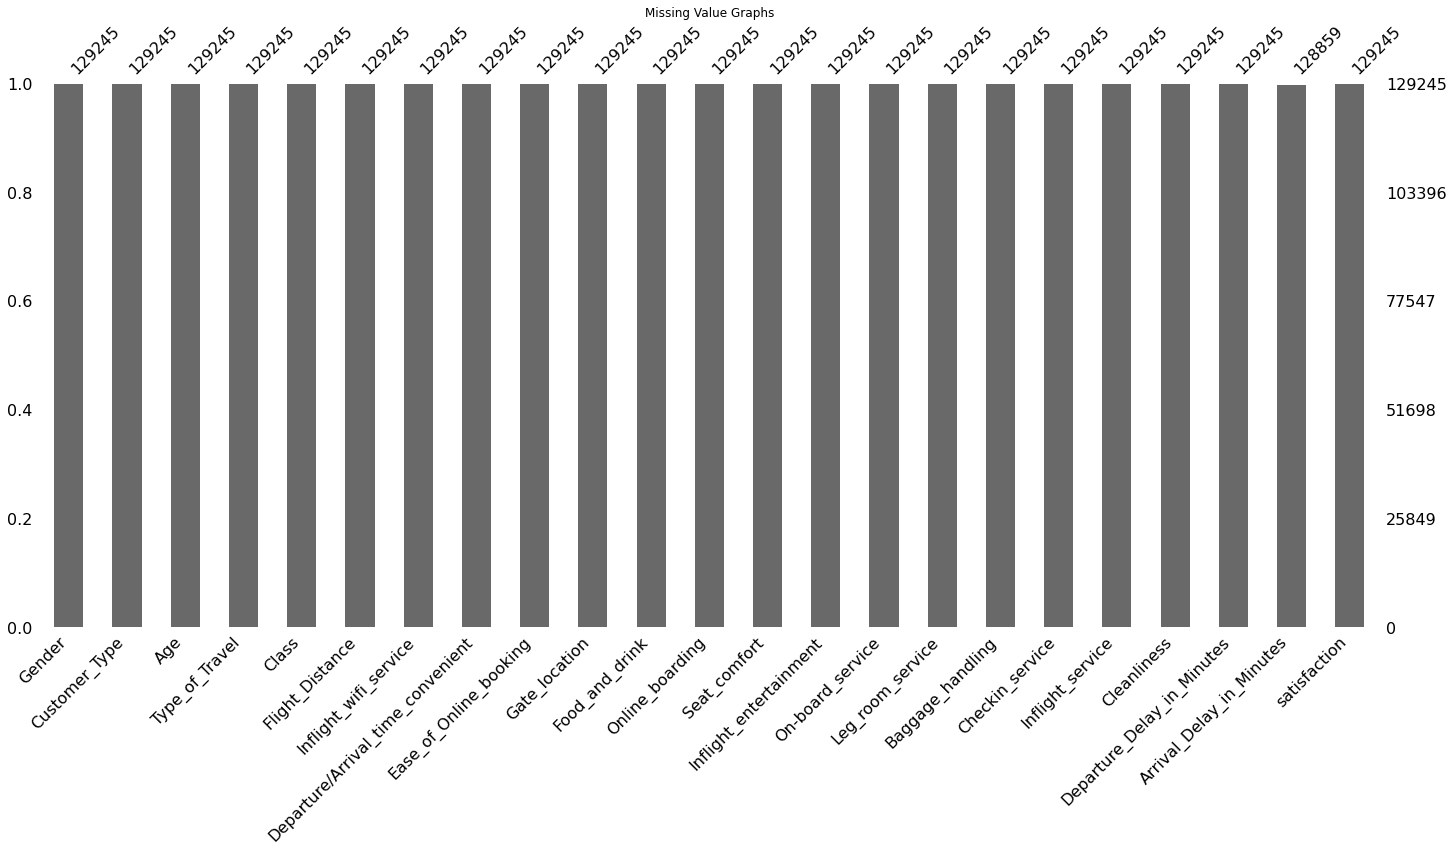

In [163]:
import missingno as msno
msno.bar(df)
plt.title("Missing Value Graphs")
plt.show()

* In the missing value chart, the only shortcoming is in Arrival_Delay_in_Munites

In [164]:
df.columns[df.isnull().any()]

Index(['Arrival_Delay_in_Minutes'], dtype='object')

In [165]:
df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             386
satisfaction                           0
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Arrival_Delay_in_Minutes has 386 missing value
* Since I do not know the flight delay time, I will try a different method.
* I will fill the nan values with the average flight delay time. Because I don't want my model to be affected by this parameter.


In [166]:
np.mean(df["Arrival_Delay_in_Minutes"])

14.882592601215281

In [167]:
df[df["Arrival_Delay_in_Minutes"].isnull()]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
511,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,0
651,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,0
1064,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,0
1215,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,0
1577,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127408,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,0
127725,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,0
127893,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,0
128301,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,1


In [168]:
df.shape

(129245, 23)

In [169]:
df["Arrival_Delay_in_Minutes"]=df["Arrival_Delay_in_Minutes"].fillna(np.mean(df["Arrival_Delay_in_Minutes"]))

In [170]:
df[df["Arrival_Delay_in_Minutes"].isnull()]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


<a id = "11"></a><br>
# Statistical Analysis

<a id = "12"></a><br>
## Correlation Matrix

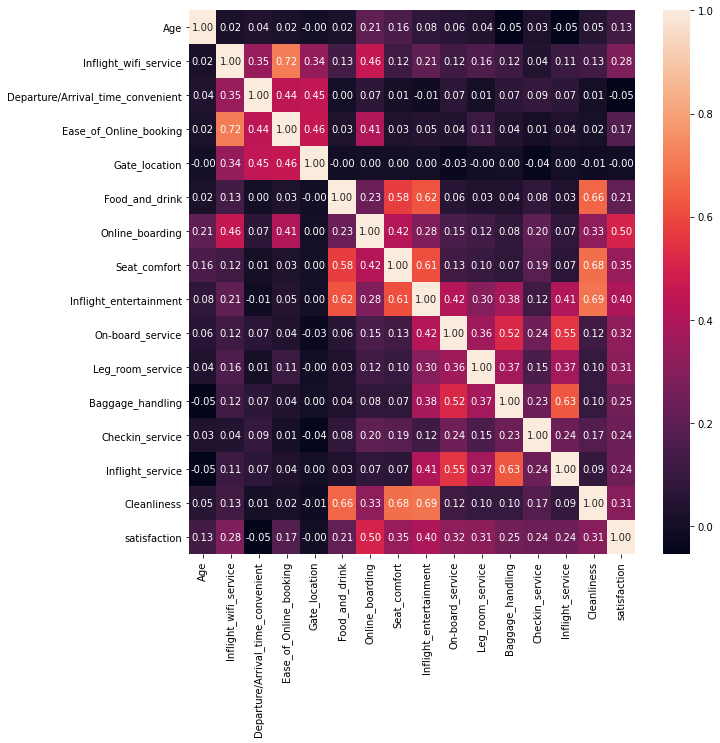

In [171]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness',"satisfaction"]
sns.heatmap(df[list1].corr(),annot=True,fmt=".2f")
plt.show()

<a id = "13"></a><br>
## Gender-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


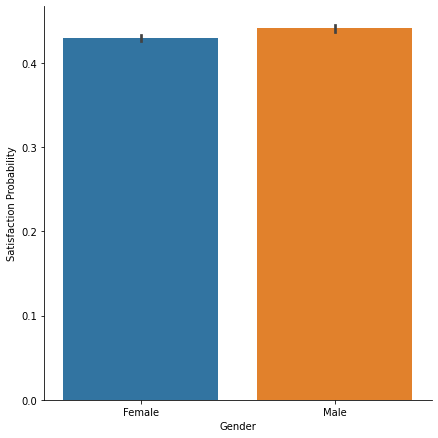

In [172]:
g=sns.catplot(x="Gender",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Females and males are satisfaction probability almost equal. Male %44, Female %43 satisfaction.

<a id = "14"></a><br>
## Age-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


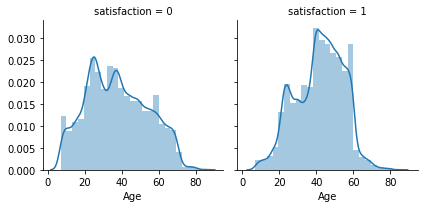

In [173]:
g= sns.FacetGrid(df,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()
# 0=neutral or dissatisfied, 1=satisfied 

* 0-20 years old is  generally neutral or dissatisfied with the flight.
* 30-60 years old is generally satisfied with the flight.
* 65-80 years old passengers is neutral or dissatisfied.

<a id = "15"></a><br>
## Customer Type-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


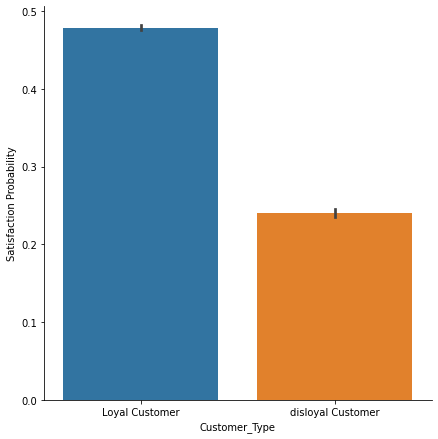

In [174]:
g=sns.factorplot(x="Customer_Type",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Disloyal customer is generally neutral or dissatisfied with the flight.

<a id = "16"></a><br>
## Type of Travel-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


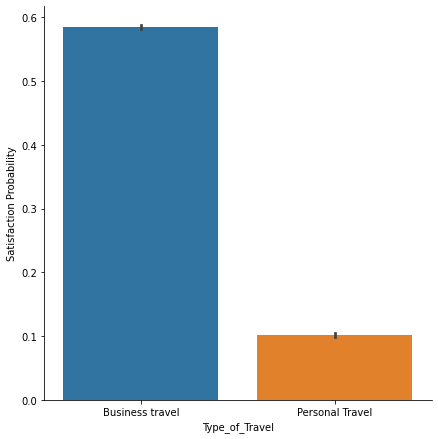

In [175]:
g=sns.factorplot(x="Type_of_Travel",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
* Personal travel is %90 neutral or dissatisfied with the flight. This statistic is interesting.

<a id = "17"></a><br>
## Class-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


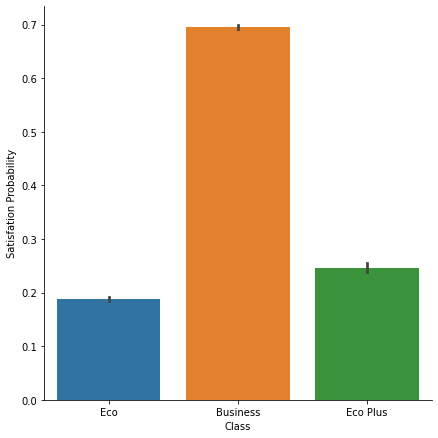

In [176]:
g=sns.factorplot(x="Class",y="satisfaction",data=df,kind="bar",size=6)
g.set_ylabels("Satisfation Probability")
plt.show()

* Business class is also happy here. But eco and eco plus  neutral or dissatisfied with the flight. 

<a id = "22"></a><br>
## Gender-->Age-->Satisfaction

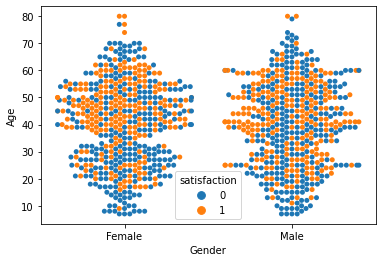

In [177]:
sns.swarmplot(x="Gender", y="Age",hue="satisfaction", data=df.head(1000))
plt.show()
# 0=neutral or dissatisfied, 1=satisfied  

<a id = "18"></a><br>

# Personal Travel Analysis
* Personal travel is generally neutral or dissatisfied with the flight.

In [178]:
personal=df[df.Type_of_Travel=="Personal Travel"]
personal.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
15,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,0,3,...,2,4,2,4,4,5,2,5,2.0,0
17,Male,Loyal Customer,52,Personal Travel,Eco Plus,1075,5,4,5,3,...,4,3,5,5,4,5,4,0,0.0,1
18,Female,Loyal Customer,43,Personal Travel,Eco,1927,3,4,3,1,...,5,5,3,5,4,5,3,0,0.0,0
21,Male,Loyal Customer,43,Personal Travel,Eco,1437,3,4,3,4,...,2,4,2,4,4,5,2,0,0.0,0
22,Male,Loyal Customer,55,Personal Travel,Eco,302,1,2,4,3,...,4,1,3,2,4,3,4,0,0.0,0


<a id = "19"></a><br>
## Service Scoring of Personal Travel Passenger

In [179]:
def service_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

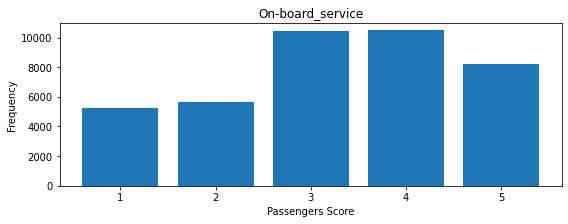

On-board_service: 
 4    10474
3    10420
5     8237
2     5619
1     5279
Name: On-board_service, dtype: int64


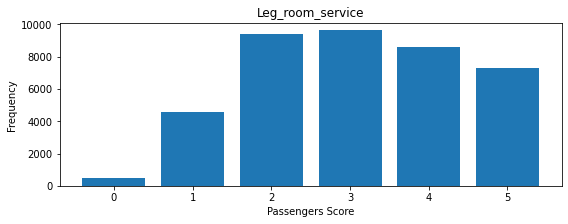

Leg_room_service: 
 3    9623
2    9409
4    8621
5    7272
1    4598
0     506
Name: Leg_room_service, dtype: int64


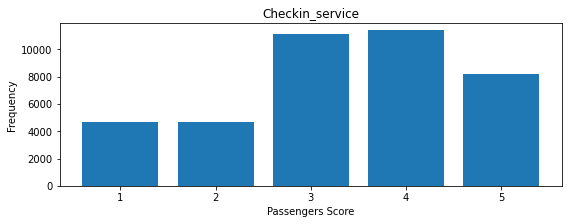

Checkin_service: 
 4    11382
3    11096
5     8190
2     4703
1     4658
Name: Checkin_service, dtype: int64


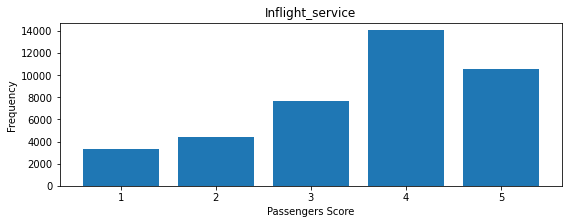

Inflight_service: 
 4    14027
5    10572
3     7679
2     4413
1     3338
Name: Inflight_service, dtype: int64


In [180]:
service=["On-board_service", "Leg_room_service", "Checkin_service","Inflight_service"]

for c in service:
    service_plot(c)

* There are 506 0 points in the leg room service.4598 has 1 point, 9409 has 2 points. Personal travel passengers are not satisfied with this service.
* There are lots of 1 and 2 points in on board service and checking service.

<a id = "20"></a><br>
## Eating, Drinking, Cleaning and In-flight Entertainment Scoring of Personal Travel Passenger

In [181]:
def eat_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

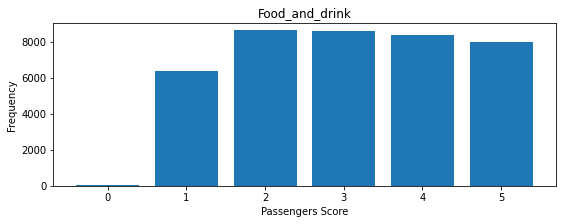

Food_and_drink: 
 2    8635
3    8633
4    8361
5    7968
1    6370
0      62
Name: Food_and_drink, dtype: int64


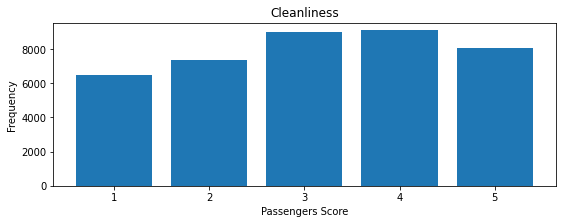

Cleanliness: 
 4    9096
3    8987
5    8072
2    7389
1    6485
Name: Cleanliness, dtype: int64


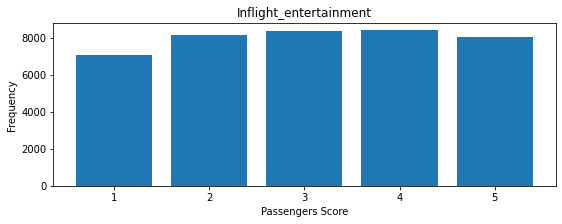

Inflight_entertainment: 
 4    8401
3    8354
2    8169
5    8023
1    7082
Name: Inflight_entertainment, dtype: int64


In [182]:
eat=["Food_and_drink", "Cleanliness", "Inflight_entertainment"]

for c in eat:
    eat_plot(c)

* There are many passengers who give 1 and 2 points in eating and drinking.There are also 62 passengers giving 0 points.
* There are many passengers who give 1 and 2 points in cleaning.
* There are many passengers who get 1 and 2 points in in-flight entertainment.
* There may be a problem with these services.

<a id = "21"></a><br>
## Aircraft Specifications Scoring

In [183]:
def flight_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

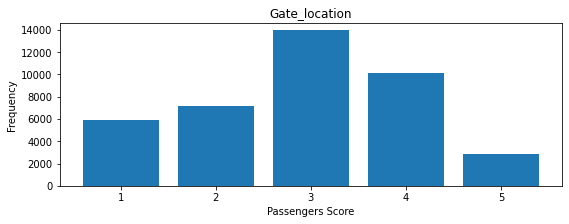

Gate_location: 
 3    13946
4    10097
2     7197
1     5917
5     2872
Name: Gate_location, dtype: int64


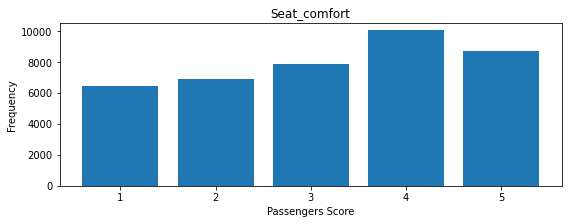

Seat_comfort: 
 4    10042
5     8743
3     7846
2     6916
1     6482
Name: Seat_comfort, dtype: int64


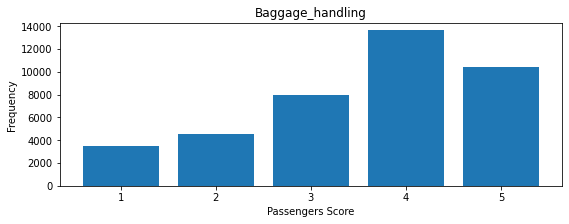

Baggage_handling: 
 4    13626
5    10438
3     7948
2     4542
1     3475
Name: Baggage_handling, dtype: int64


In [184]:
flight=["Gate_location", "Seat_comfort", "Baggage_handling"]

for c in flight:
    flight_plot(c)

* The gate position of the plane is not liked.
* Seat comfort is also not liked.

<AxesSubplot:title={'center':'Correlation with Satisfied Customer'}>

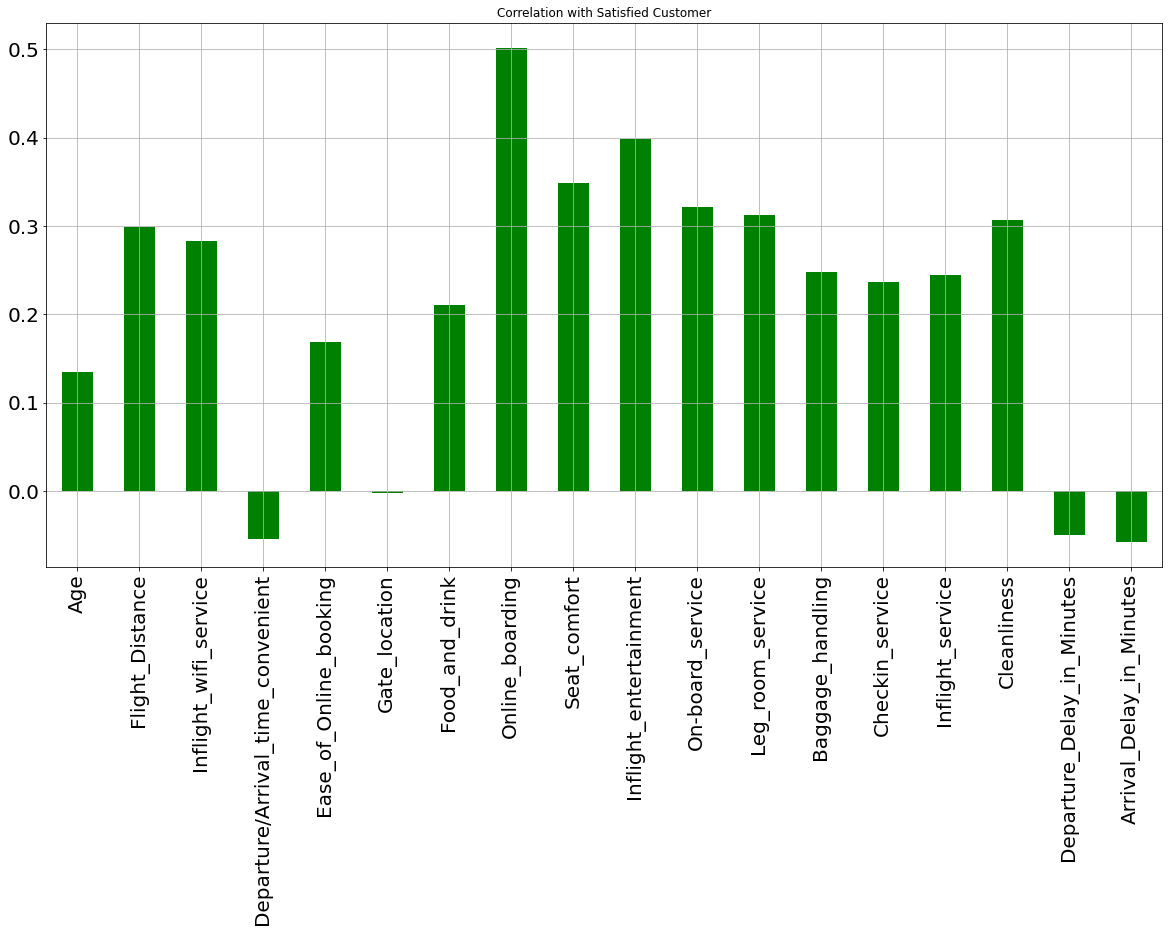

In [185]:
# Finding correlation of satisfaction with the features
X = df.drop(['satisfaction'],axis=1)
X.corrwith(df['satisfaction']).plot.bar(figsize=(20,10), title="Correlation with Satisfied Customer",
                                                   fontsize=20,rot=90,grid=True,color='g')

<a id = "23"></a><br>
# Feature Engineering 
* Our aim in this section is to bring out new features.

<a id = "24"></a><br>
## Customer Type

In [186]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


<AxesSubplot:xlabel='Customer_Type', ylabel='count'>

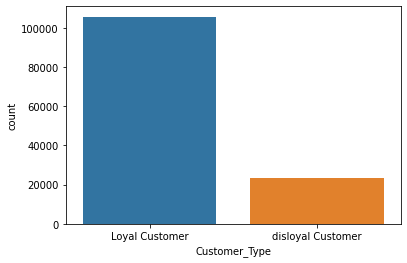

In [187]:
sns.countplot(x="Customer_Type",data=df)

In [188]:
# one-hot encoding for categorical variables
df=pd.get_dummies(df,columns=["Customer_Type"])
df.head()

,Gender,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer
0,Female,52,Business travel,Eco,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,1,1,0
1,Female,36,Business travel,Business,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1,1,0
2,Male,20,Business travel,Eco,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0,0,1
3,Male,44,Business travel,Business,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1,1,0
4,Female,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,1,1,0


<a id = "25"></a><br>
## Type of Travel

In [189]:
df.Type_of_Travel.head()

0    Business travel
1    Business travel
2    Business travel
3    Business travel
4    Business travel
Name: Type_of_Travel, dtype: object

<AxesSubplot:xlabel='Type_of_Travel', ylabel='count'>

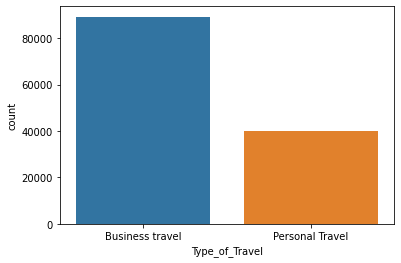

In [190]:
sns.countplot(x="Type_of_Travel",data=df)

In [191]:
# one-hot encoding for categorical variables
df=pd.get_dummies(df,columns=["Type_of_Travel"])
df.head()

,Gender,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,Female,52,Eco,160,5,4,3,4,3,4,...,2,5,5,50,44.0,1,1,0,1,0
1,Female,36,Business,2863,1,1,3,1,5,4,...,3,4,5,0,0.0,1,1,0,1,0
2,Male,20,Eco,192,2,0,2,4,2,2,...,2,2,2,0,0.0,0,0,1,1,0
3,Male,44,Business,3377,0,0,0,2,3,4,...,3,1,4,0,6.0,1,1,0,1,0
4,Female,49,Eco,1182,2,3,4,3,4,1,...,4,2,4,0,20.0,1,1,0,1,0


<a id = "26"></a><br>
## Class

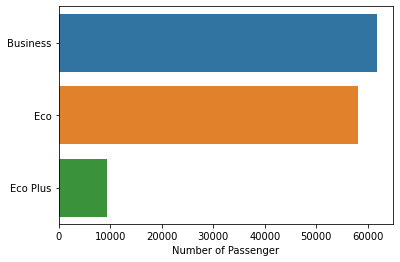

In [192]:
sns.barplot(x=df.Class.value_counts().values,y=df.Class.value_counts().index)
plt.xlabel("Number of Passenger")
plt.show()

In [193]:
# one-hot encoding for categorical variables
df=pd.get_dummies(df,columns=["Class"])
df.head()

,Gender,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,Female,52,160,5,4,3,4,3,4,3,...,50,44.0,1,1,0,1,0,0,1,0
1,Female,36,2863,1,1,3,1,5,4,5,...,0,0.0,1,1,0,1,0,1,0,0
2,Male,20,192,2,0,2,4,2,2,2,...,0,0.0,0,0,1,1,0,0,1,0
3,Male,44,3377,0,0,0,2,3,4,4,...,0,6.0,1,1,0,1,0,1,0,0
4,Female,49,1182,2,3,4,3,4,1,2,...,0,20.0,1,1,0,1,0,0,1,0


<a id = "27"></a><br>
## Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

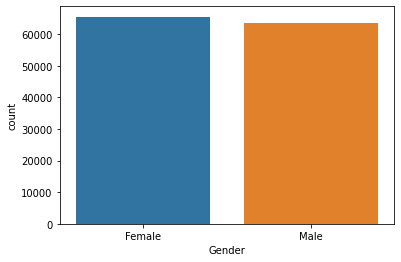

In [194]:
sns.countplot(x="Gender",data=df)

In [195]:
# one-hot encoding for categorical variables
df=pd.get_dummies(df,columns=["Gender"])
df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,52,160,5,4,3,4,3,4,3,5,...,1,1,0,1,0,0,1,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1,0,1,0,1,0,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,1,0,0,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,1,1,0,1,0,0,1,0,1,0


In [196]:
df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,52,160,5,4,3,4,3,4,3,5,...,1,1,0,1,0,0,1,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1,0,1,0,1,0,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,1,0,0,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,1,1,0,1,0,0,1,0,1,0
